<a href="https://colab.research.google.com/github/Frantala/Data-Python/blob/main/An%C3%A1lisis_de_Aeropuertos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de un Dataframe creado sobre aeropuertos



In [1]:
#importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creamos un  dataframe de todos los aeropuertos de la ciudad de seattle
airports = pd.DataFrame([
    ['Seattle-Tacoma', 'Seattle', 'USA', 15000],
    ['Portland', 'Portland', 'USA', 8000],
    ['Vancouver', 'Vancouver', 'Canada', 10000],
    ['Calgary', 'Calgary', 'Canada', 15500],
    ['Edmonton', 'Edmonton', 'Canada', 8000],
    ['Winnipeg', 'Winnipeg', 'Canada', 12500],
],columns=['NAME', 'CITY', 'COUNTRY', 'PEOPLE'])
airports

NAME       CITY COUNTRY  PEOPLE
0  Seattle-Tacoma    Seattle     USA   15000
1        Portland   Portland     USA    8000
2       Vancouver  Vancouver  Canada   10000
3         Calgary    Calgary  Canada   15500
4        Edmonton   Edmonton  Canada    8000
5        Winnipeg   Winnipeg  Canada   12500

In [3]:
#Mostramos solamente los primeros dos columnas del df
airports.head(2)

NAME      CITY COUNTRY  PEOPLE
0  Seattle-Tacoma   Seattle     USA   15000
1        Portland  Portland     USA    8000

In [4]:
# Mostramos la "forma" del df es decir sus filas y columnas
airports.shape

(6, 4)

In [5]:
#Mostramos informacion mas especificas del df que estamos analizando
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NAME     6 non-null      object
 1   CITY     6 non-null      object
 2   COUNTRY  6 non-null      object
 3   PEOPLE   6 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 324.0+ bytes


In [6]:
#Mostramos una columna en especifico del Df
airports['CITY']

0      Seattle
1     Portland
2    Vancouver
3      Calgary
4     Edmonton
5     Winnipeg
Name: CITY, dtype: object

In [7]:
#Devolvemos un valor en especifico con iloc
airports.iloc[2,1]

'Vancouver'

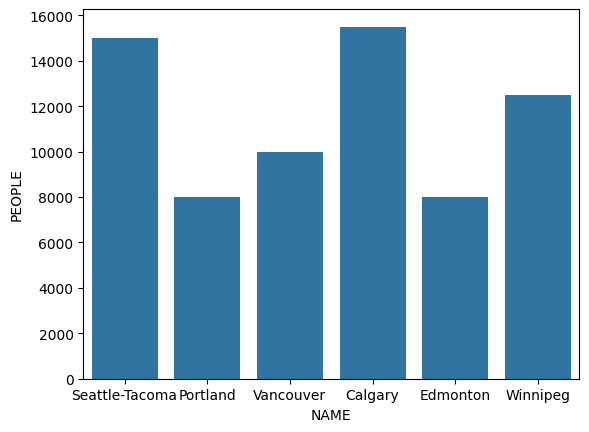

In [8]:
#Creamos un grafico de barras para visualizar los datos
sns.barplot(x='NAME', y='PEOPLE', data=airports)

#mostrando el grafico
plt.show()

In [9]:
#accediendo a un valor en especifico con loc
airports.loc[1]

NAME       Portland
CITY       Portland
COUNTRY         USA
PEOPLE         8000
Name: 1, dtype: object

In [10]:
# utilizando slicing para obtener una cantidad de datos del dataframe
airports[2:6]

NAME       CITY COUNTRY  PEOPLE
2  Vancouver  Vancouver  Canada   10000
3    Calgary    Calgary  Canada   15500
4   Edmonton   Edmonton  Canada    8000
5   Winnipeg   Winnipeg  Canada   12500

In [11]:
# utlizamos la propiedad sort_values para ordenarlo de forma descendente
df_ordenado = airports.sort_values(by='PEOPLE', ascending=False)
df_ordenado

NAME       CITY COUNTRY  PEOPLE
3         Calgary    Calgary  Canada   15500
0  Seattle-Tacoma    Seattle     USA   15000
5        Winnipeg   Winnipeg  Canada   12500
2       Vancouver  Vancouver  Canada   10000
1        Portland   Portland     USA    8000
4        Edmonton   Edmonton  Canada    8000

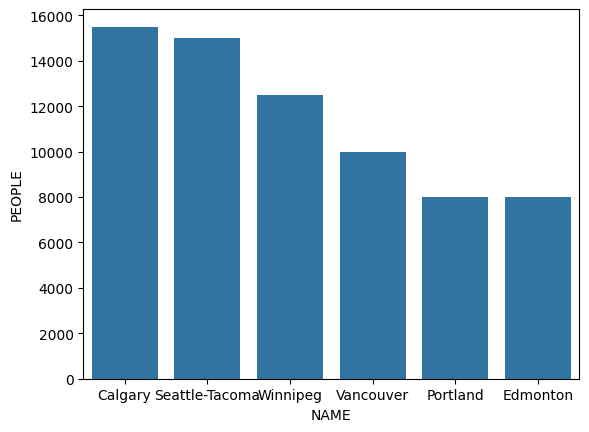

In [12]:
# grafico pero ahora con el dataframe ordenado
sns.barplot(x='NAME', y='PEOPLE', data=df_ordenado)
plt.show()

In [13]:
# Creamos un nuevo Dataframe
airports_2 = pd.DataFrame([
    ['Leipzig', 'Leipzig', 'Germany', 10000],
    ['Berlin', 'Berlin', 'Germany', 20000],
    ['London', 'London', 'United Kingdom', 30000],
    ['Paris', 'Paris', 'France', 40000],
    ['Madrid', 'Madrid', 'Spain', 50000],
], columns=['NAME', 'CITY', 'COUNTRY', 'PEOPLE'])
airports_2

NAME     CITY         COUNTRY  PEOPLE
0  Leipzig  Leipzig         Germany   10000
1   Berlin   Berlin         Germany   20000
2   London   London  United Kingdom   30000
3    Paris    Paris          France   40000
4   Madrid   Madrid           Spain   50000

In [14]:
#Concatenando los 2 dataframes
airports_concat = pd.concat([airports, airports_2])
airports_concat

NAME       CITY         COUNTRY  PEOPLE
0  Seattle-Tacoma    Seattle             USA   15000
1        Portland   Portland             USA    8000
2       Vancouver  Vancouver          Canada   10000
3         Calgary    Calgary          Canada   15500
4        Edmonton   Edmonton          Canada    8000
5        Winnipeg   Winnipeg          Canada   12500
0         Leipzig    Leipzig         Germany   10000
1          Berlin     Berlin         Germany   20000
2          London     London  United Kingdom   30000
3           Paris      Paris          France   40000
4          Madrid     Madrid           Spain   50000

In [15]:
#Obteniendo datos estadisticos del dataframe concatenado
airports_concat.describe()

PEOPLE
count     11.000000
mean   19909.090909
std    14104.641402
min     8000.000000
25%    10000.000000
50%    15000.000000
75%    25000.000000
max    50000.000000

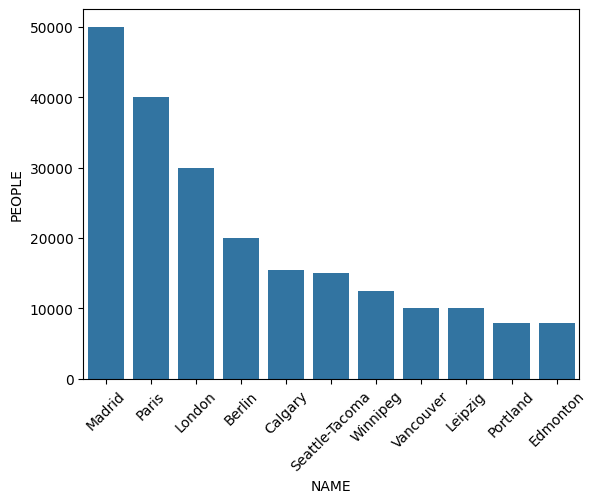

In [16]:
# grafico del df concatenado completo pero de forma descendente
sns.barplot(x='NAME', y='PEOPLE', data=airports_concat.sort_values(by='PEOPLE', ascending=False))
plt.xticks(rotation=45)
plt.show()

### CreaciÃ³n de un Mapa para visualizar los lugares geograficos de los aeropuertos
Utilizaremos Geopandas para crear un DataFrame con las coordenadas de los aeropuertos

In [18]:
import geopandas
from geodatasets import get_path

ModuleNotFoundError: No module named 'geodatasets'

In [10]:
# Creamos un dataframe con todas las cordenadas de las ciudades
df = pd.DataFrame(
    {
        "City": ['Seattle', 'Portland', 'Vancouver', 'Calgary', 'Edmonton', 'Winnipeg'],
        "Country": ['USA', 'USA', 'Canada', 'Canada', 'Canada', 'Canada'],
        "Latitude": [47.4490, 45.5889, 49.1947, 51.1111, 53.1003, 49.8972],
        "Longitude":[122.3090, 122.5970, 123.1900, 114.0160, 113.3050, 97.1511],
    }
)

In [15]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Latitude, df.Longitude), crs="EPSG:4326"
)

gdf.head()

City Country  Latitude  Longitude                 geometry
0    Seattle     USA   47.4490    122.309   POINT (47.449 122.309)
1   Portland     USA   45.5889    122.597  POINT (45.5889 122.597)
2  Vancouver  Canada   49.1947    123.190   POINT (49.1947 123.19)
3    Calgary  Canada   51.1111    114.016  POINT (51.1111 114.016)
4   Edmonton  Canada   53.1003    113.305  POINT (53.1003 113.305)

In [ ]:
# Finalmente volcamos los datos en un mapa 

world = geopandas.read_file(get_path("naturalearth.land"))

# We restrict to South America.
ax = world.clip([-90, -55, -25, 15]).plot(color="white", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red")

plt.show()

## Exportamos todo a un Excel 
Utlizacion de la funcion de Pandas llamada "to_excel"

In [17]:
airports_concat.to_excel('Airports.xlsx', sheet_name="Datos Aeropuertos") 
#lo que hacemos es pasarle un archvio excel en este caso no existe, pero lo creamos